O presente estudo discorre sobre [microdados](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) do ENEM (Exame Nacional do Ensino Médio) 2023. Não obstante, foram selecionados apenas registros referentes as provas realizadas no estado do Amapá.

# PREPARAÇÃO, ORGANIZAÇÃO E ESTRUTURAÇÃO DOS DADOS

In [1]:
# Manipulação e análise de dados
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 25)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/enem2023/enem_ap2023_tratado.csv",
                 sep=';', encoding="utf-8")

df.head()

,INSCRICAO,FAIXA_ETARIA,SEXO,ESTADO_CIVIL,COR_RACA,NACIONALIDADE,ESCOLA,ENSINO,MUNICIPIO_ESC,UF_ESC,DEPENDENCIA_ADM_ESC,LOCALIZACAO_ESC,SIT_FUNC_ESC,MUNICIPIO_PROVA,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,LINGUA,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
0,210059587847,19 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,522.7,544.6,528.5,432.2,Espanhol,160.0,180.0,180.0,160.0,200.0,880.0
1,210059388096,19 anos,M,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,539.4,551.7,570.4,420.7,Espanhol,120.0,140.0,140.0,120.0,40.0,560.0
2,210059982331,26-30 anos,F,1,Parda,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Santana,393.0,501.7,511.6,349.0,Espanhol,100.0,120.0,120.0,120.0,60.0,520.0
3,210058941508,21 anos,F,1,Preta,Brasileiro(a),Não respondeu,NaN,NaN,NaN,NaN,NaN,NaN,Macapá,484.9,504.8,503.4,445.7,Espanhol,140.0,180.0,160.0,160.0,120.0,760.0
4,210059855130,17 anos,M,1,Parda,Brasileiro(a),Pública,Regular,Santana,AP,Estadual,Urbana,Ativa,Santana,502.2,516.9,474.3,590.9,Espanhol,160.0,180.0,160.0,160.0,160.0,820.0


In [4]:
df.shape

(14793, 25)

O conjunto de dados original possui 14793 registros e 25 colunas.

**1. OTIMIZAÇÃO DOS DADOS**  
Apesar de não haver muitos registros, vamos implementar uma redução do espaço ocupado como boa-prática.

In [5]:
# Verificando tamanho do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INSCRICAO            14793 non-null  int64  
 1   FAIXA_ETARIA         14793 non-null  object 
 2   SEXO                 14793 non-null  object 
 3   ESTADO_CIVIL         14793 non-null  int64  
 4   COR_RACA             14793 non-null  object 
 5   NACIONALIDADE        14793 non-null  object 
 6   ESCOLA               14793 non-null  object 
 7   ENSINO               5308 non-null   object 
 8   MUNICIPIO_ESC        3307 non-null   object 
 9   UF_ESC               3307 non-null   object 
 10  DEPENDENCIA_ADM_ESC  3307 non-null   object 
 11  LOCALIZACAO_ESC      3307 non-null   object 
 12  SIT_FUNC_ESC         3307 non-null   object 
 13  MUNICIPIO_PROVA      14793 non-null  object 
 14  NOTA_CN              14793 non-null  float64
 15  NOTA_CH              14793 non-null 

In [6]:
# Selecionando colunas numéricas por tipo
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [7]:
# Aplicando downcast nas colunas float e int
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

In [8]:
df.drop("INSCRICAO", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FAIXA_ETARIA         14793 non-null  object 
 1   SEXO                 14793 non-null  object 
 2   ESTADO_CIVIL         14793 non-null  int8   
 3   COR_RACA             14793 non-null  object 
 4   NACIONALIDADE        14793 non-null  object 
 5   ESCOLA               14793 non-null  object 
 6   ENSINO               5308 non-null   object 
 7   MUNICIPIO_ESC        3307 non-null   object 
 8   UF_ESC               3307 non-null   object 
 9   DEPENDENCIA_ADM_ESC  3307 non-null   object 
 10  LOCALIZACAO_ESC      3307 non-null   object 
 11  SIT_FUNC_ESC         3307 non-null   object 
 12  MUNICIPIO_PROVA      14793 non-null  object 
 13  NOTA_CN              14793 non-null  float32
 14  NOTA_CH              14793 non-null  float32
 15  NOTA_LC              14793 non-null 

O espaço foi reduzido em aproximadamente 800mb.

# CORRELAÇÃO
A correlação, basicamente mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.  

Para esse estudo, vamos analisar a relação entre as notas das provas de alunos de escolas privadas.

## Diretrizes
Alguns critérios são estabelecidos para descobrir se o teste de correlação a ser utilizado deve ser paramétrico ou não-paramétrico, contudo, vamos ter como base a Correlação Linear de Pearson.

**1) Escala de medida**  
Para escolher o tipo de correlação adequado, primeiro precisamos identificar a escala de medida das variáveis envolvidas.

In [10]:
df2 = df.copy()[df.ESCOLA == 'Privada']

In [11]:
df2.drop(columns=['FAIXA_ETARIA', 'SEXO', 'ESTADO_CIVIL', 'COR_RACA',
                  'NACIONALIDADE', 'ESCOLA', 'ENSINO', 'MUNICIPIO_ESC',
                  'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC',
                  'SIT_FUNC_ESC', 'MUNICIPIO_PROVA', 'LINGUA', 'NOTA_COMP1',
                  'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5'],
         inplace=True)

In [12]:
df2.head()

,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,NOTA_REDACAO
235,528.200012,575.900024,585.500000,674.099976,820.0
241,415.799988,438.899994,409.600006,418.399994,580.0
258,418.100006,585.200012,587.000000,452.899994,360.0
283,596.599976,640.700012,588.599976,700.900024,940.0
495,583.000000,609.799988,615.799988,587.700012,920.0


In [13]:
df2.dtypes

,0
NOTA_CN,float32
NOTA_CH,float32
NOTA_LC,float32
NOTA_MT,float32
NOTA_REDACAO,float32


Observando os resultados, percebemos que as variáveis são do tipo necessário à correlação linear (quantitativa contínua).

**2) Independência**  
As observações devem ser independentes umas das outras e, conhecendo a natureza das variáveis, sabemos que as mesmas se enquadram nesse requisito.

**3) Relação entre as variáveis**  
É essencial entender a natureza da relação entre as variáveis (linear ou não).

In [14]:
from pandas.plotting import scatter_matrix
import seaborn as sns

In [15]:
# Definindo um tema de fundo claro
sns.set_theme(style="whitegrid")

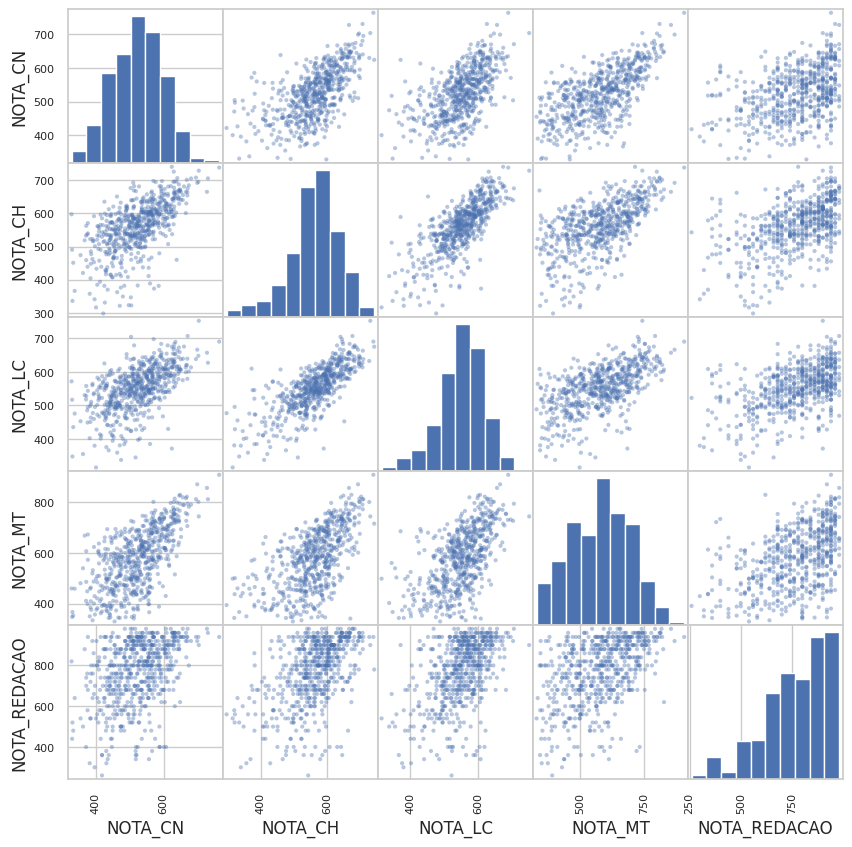

In [16]:
scatter_matrix(df2, alpha=0.4, figsize=(10, 10));

Todas as relações demonstraram ser linear-positiva.

**4) Normalidade**  
A distribuição das variáveis deve ser aproximadamente normal. Isso é especialmente importante para a significância estatística da correlação.

**TESTES GRÁFICOS**

In [17]:
import matplotlib.pyplot as plt
from scipy import stats


def qq_subplots(df):
    # Número de linhas
    if (len(df.columns) % 2) == 0:
        nrows = int(len(df.columns) / 2)
    else:
        nrows = int((len(df.columns) + 1) / 2)

    # Criação do gráfico
    fig, axes = plt.subplots(nrows, 2, figsize=(12, nrows*4))

    # Achatar os eixos para fácil iteração
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=axes[i])
        axes[i].set_title(f"QQ-plot de {column}")

    return plt.tight_layout()

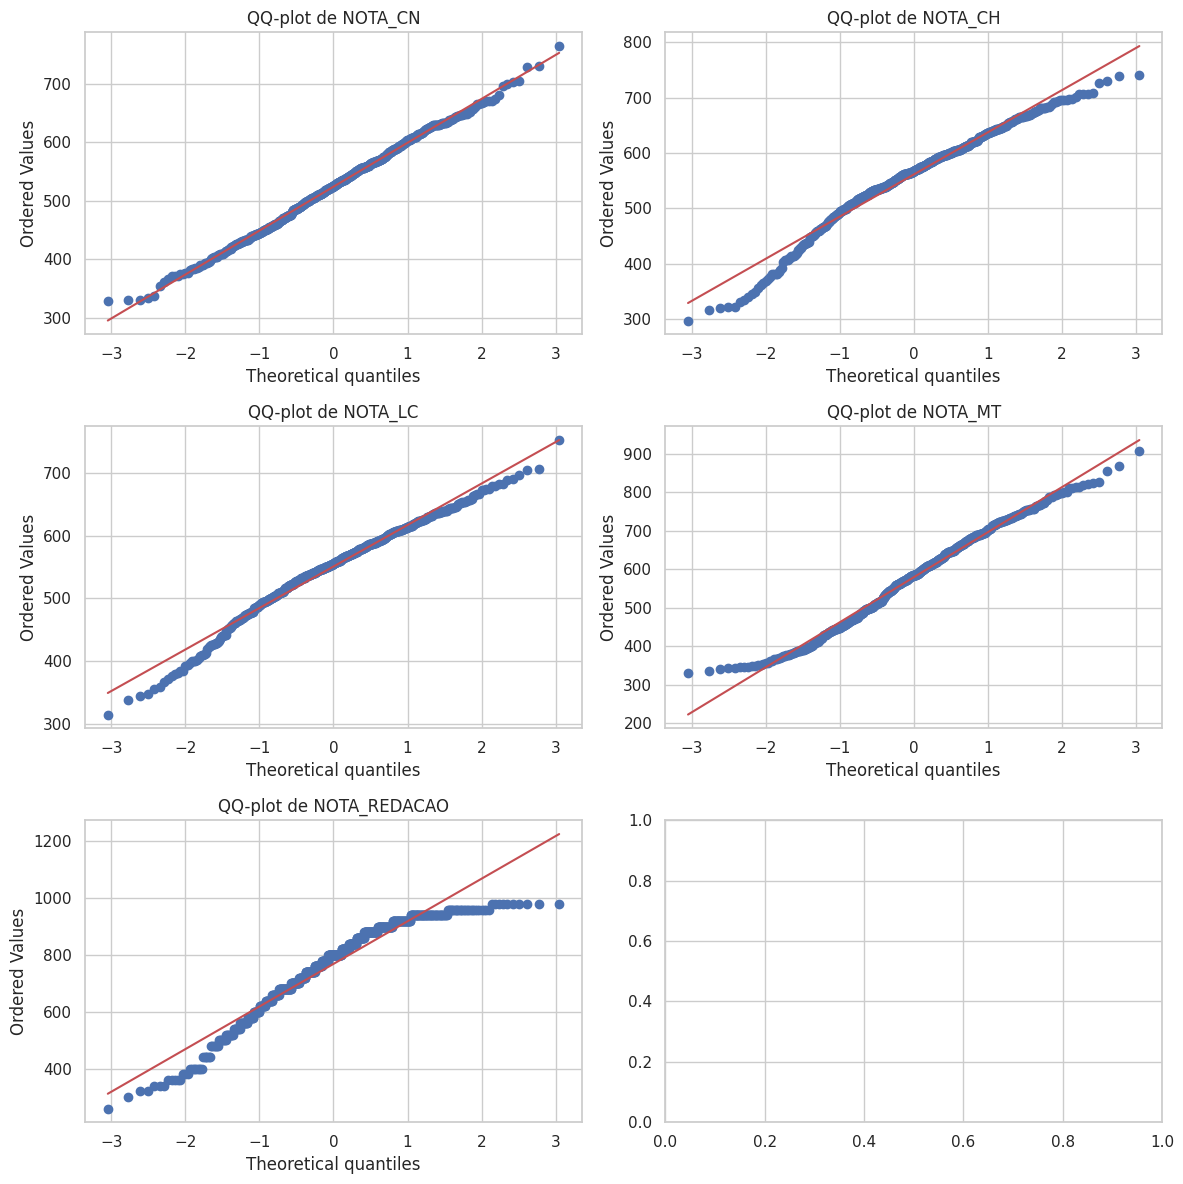

In [18]:
qq_subplots(df2)

No geral, as "caudas" das distribuições aparentemente se desvia da normalidade. Não obstante, uma análise mais precisa com testes numéricos será realizada.

**TESTES NUMÉRICOS**  
Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Os dados seguem uma distribuição normal;
- **H<sub>1</sub>:** Os dados não seguem uma distribuição normal.

In [19]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors

def normalidade(df, cols=None):
    if isinstance(cols, str):
        cols = [cols]
    elif cols == None:
        cols = df.columns

    results = []

    # Vários testes numéricos de normalidade
    for col in cols:
        shapiro = stats.shapiro(df[col])[1]
        lillie = lilliefors(df[col], dist="norm")[1]
        jarque = stats.jarque_bera(df[col])[1]
        anderson = stats.anderson(df[col], dist="norm")[1][2] # alpha = 0.05

        results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                        "JARQUE": jarque, "ANDERSON": anderson})

    # retorna o p-valor das variáveis
    return pd.DataFrame(results, index=cols)

In [20]:
normalidade(df2)

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
NOTA_CN,4.301804e-01,0.605052,3.905181e-01,0.782
NOTA_CH,6.043903e-09,0.001000,3.593939e-12,0.782
NOTA_LC,6.810875e-07,0.001000,9.238867e-09,0.782
NOTA_MT,7.857343e-05,0.081791,2.192716e-03,0.782
NOTA_REDACAO,3.061377e-16,0.001000,4.685301e-16,0.782


Nenhuma variável obteve p-valor maior que o nível de significância alfa em mais de dois testes. Com isso, optamos por rejeitar a hipótese de normalidade para todas as variáveis. Dessa forma, vamos prosseguir com um teste não-paramétrico para analisar a correlação.

## Rho de Spearman
Medida estatística que avalia força e direção de uma relação monotônica entre duas variáveis.

**1\. Força e Direção**  
A força da correlação indica quão fortemente duas variáveis estão relacionadas entre si. Já a direção da correlação revela se a relação entre as variáveis é ascendente ou descendente.

Ao final dos teste de força e direção, as variáveis com a correlação "mais forte" serão escolhidas para avaliação da significância correlacional.

| COEFICIENTE | GRAU |
- | -
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Sem correlação |

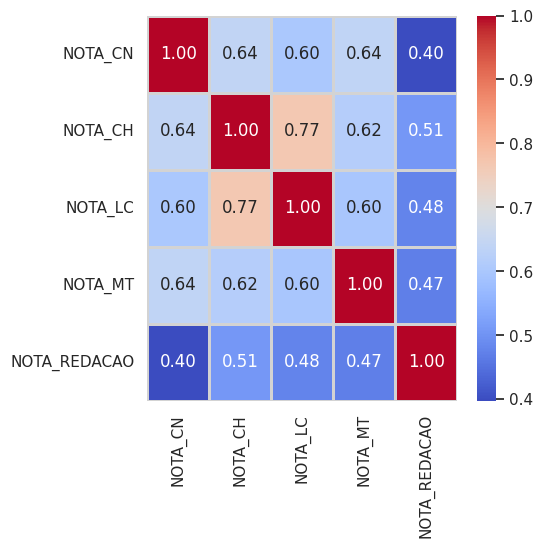

In [21]:
plt.figure(figsize=(df2.shape[1], df2.shape[1]))

sns.heatmap(df2.corr(method="spearman"), annot=True, fmt=".2f",
            cmap="coolwarm", cbar=True, linewidths=1, linecolor='lightgrey');

NOTA_CH possui a "combinação de correlações" mais forte, que vão de moderadas a fortes.

**2\. Significância Estatística**  
Testes estatísticos devem ser utilizados para verificar se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub> → ρ de Spearman = 0:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub> → ρ de Spearman ≠ 0:** Há correlação significativa entre as variáveis.

In [22]:
p_valores = []
variaveis = []

# Calculando a correlação de Spearman
for i in df2.columns:
    if i == 'NOTA_CH':
        continue
    else:
        estat, p_valor = stats.spearmanr(df2['NOTA_CH'], df2[i])
        p_valores.append(p_valor)
        variaveis.append(i)

# Criando o DataFrame com os resultados
pd.DataFrame({'p-valor': p_valores}, index=variaveis).transpose()

,NOTA_CN,NOTA_LC,NOTA_MT,NOTA_REDACAO
p-valor,7.371971e-71,1.051208e-117,1.129329e-64,1.197361e-40


Como todos os p-valores são menores que o nível de significância escolhido se assum a hipótese alternativa, portanto, a correlação observada com *NOTA_CH* provavelmente não ocorreu por acaso. Por fim, é importante lembrar que correlação não implica causalidade, ou seja, não necessariamente uma variável está causando a outra. Por isso, um estudo mais aprofundado do caso deve ser feito.

# Regressão Linear Múltipla
Método estatístico que busca estabelecer uma relação linear entre variáveis independentes e uma dependente.

---
<br></br>
**INTRODUÇÃO**  
É senso comum acreditar que candidatos ao ENEM que tirem boas notas em áreas de humanas da prova não tenham o mesmo desempenho em exatas. Contudo, levando em consideração os resultados do estudo de correlação anteriormente apresentados, podemos inferir que esse ponto de vista pode ser equivocado, se tratando das provas do ENEM realizadas no ano de 2023. A Regressão Linear Múltipla pode ser utilizada para investigar essa possível relação.

**OBJETIVO**  
Verificar se as notas de Ciências Humanas e suas Tecnologias (NOTA_CH), são influenciadas pelas provas de Linguagens, Códigos e suas Tecnologias (NOTA_LC), Ciências da Natureza e suas Tecnologias (NOTA_CN), Matemática e suas Tecnologias (NOTA_MT) e Redação (NOTA_REDACAO). Ao se constatar ligação entre as provas, vamos utilizar o modelo para fazer previsões.

**JUSTIFICATIVA**  
Ao se constatar que as provas supracitadas de fato impactam as notas de Ciências Humanas e quanto o fazem, podemos tomar medidas para aprimorar os resultados das provas.

**HIPÓTESE**  
Com base nos resultados da análise de correlação, vamos assumir que a variável dependente (NOTA_CH) possui relação linear positiva significativa com as variáveis independentes (NOTA_LC, NOTA_CN, NOTA_MT e NOTA_REDACAO).

**METODOLOGIA**  
O método dos Mínimos Quadrados Ordinários (MQO) será utilizado para encontrar o melhor ajuste entre NOTA_CH e *NOTA_CN*, *NOTA_LC*, *NOTA_MT* e *NOTA_REDACAO*. Não obstante, será avaliada a eficiência do modelo de regressão linear múltipla em explicar a variabilidade das notas de Ciências Humanas, verificando se a combinação linear das variáveis independentes fornece um ajuste significativo e preditivamente relevante, através de métodos estatísticos como verificação do p-valor, análise dos resíduos e avaliação do coeficiente de determinação serão utilizados para avaliar a eficiência dessa reta, modelo.

## Linearidade
A relação linear entre as variáveis é pressuposto sumário à regressão. Se a mesma não for atendida, o modelo pode não ter um bom ajuste.

In [23]:
X = df2[['NOTA_CN', 'NOTA_LC', 'NOTA_MT', 'NOTA_REDACAO']]

y = df2[['NOTA_CH']]

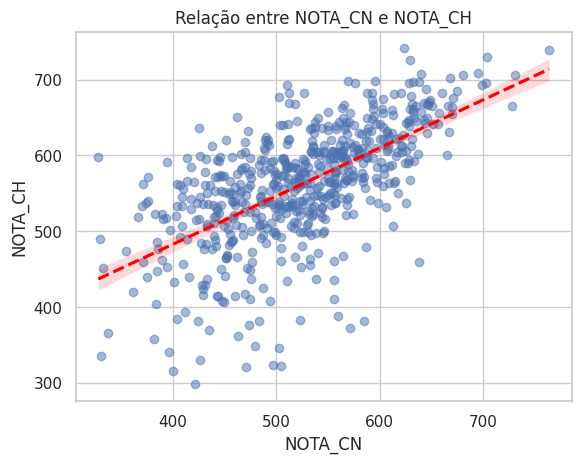

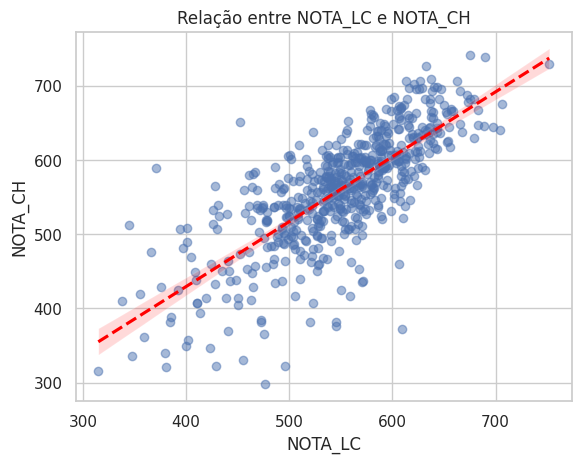

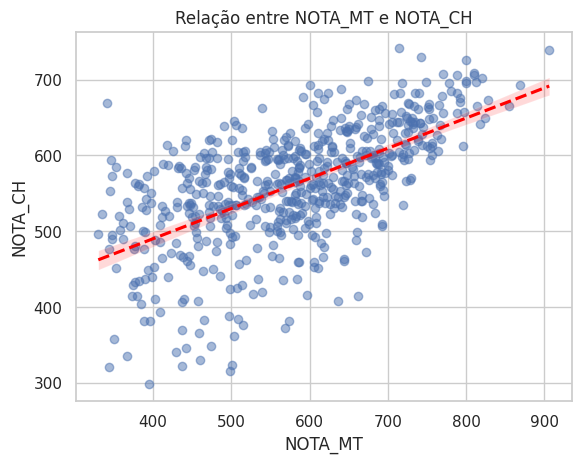

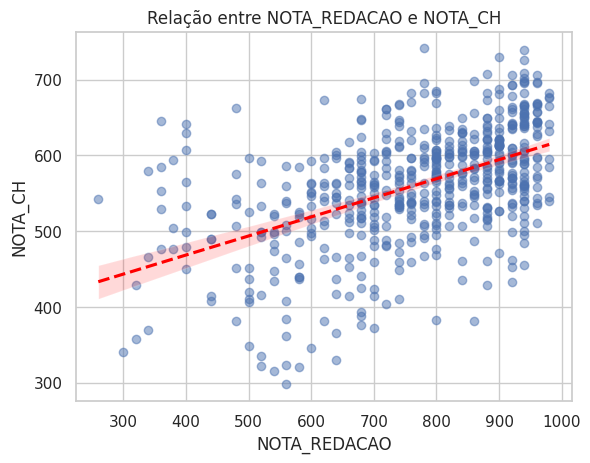

In [24]:
for i in X.columns:
    # Gráfico de dispersão com linha de tendência
    sns.regplot(x=df2[i], y=y, scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red', 'linestyle': '--'})

    # Configurações do layout
    plt.xlabel(i)
    plt.ylabel('NOTA_CH')
    plt.title(f'Relação entre {i} e NOTA_CH')
    plt.show()

Observando o gráfico, é possível identificar relação de linearidade entre todas as variáveis.

## Distribuição
A normalidade não é pressuposto à regressão, contudo, se a variável dependente for assimétrica ou tiver uma distribuição muito diferente da normal (o que foi constatado na análise de correlação), ou tiver muitos outliers, pode ser um indicativo inicial de que os resíduos podem não ser normais (pressuposto) após o ajuste do modelo (na verdade, já constatei que estes não são normais).

In [25]:
df_out = pd.melt(df2, value_vars=df2.columns, var_name='PROVAS',
                 value_name='NOTA')

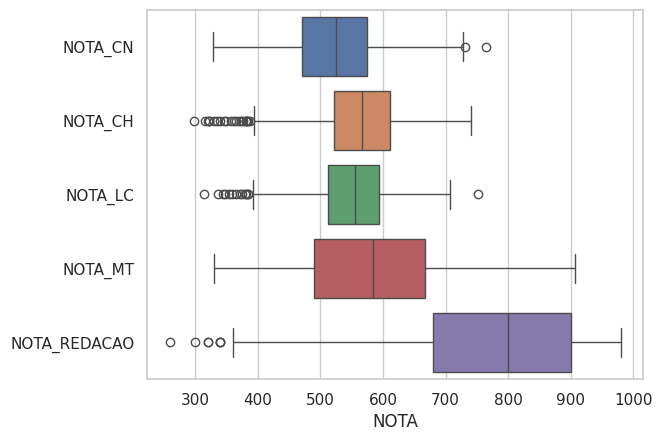

In [26]:
ax = sns.boxplot(data=df_out, x='NOTA', y='PROVAS', hue='PROVAS')

ax.set_ylabel('');

Há presença de outliers em praticamente todas as variáveis.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [29]:
from scipy.stats import boxcox

In [30]:
y_train_boxcox, lambda_boxcox = boxcox(y_train.squeeze())

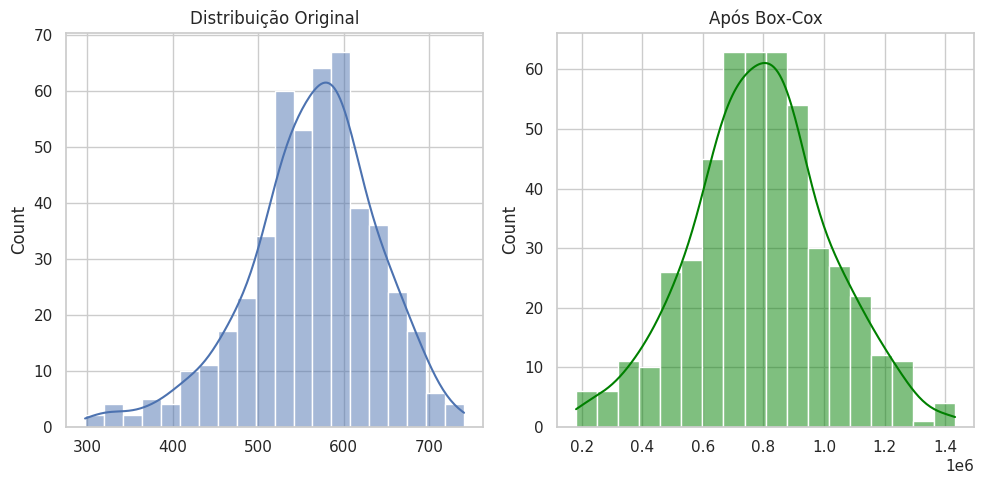

In [31]:
# Visualizar a distribuição após Box-Cox
plt.figure(figsize=(10, 5))

# Antes da transformação
plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, color="skyblue", legend=False)
plt.title("Distribuição Original")

# Depois da transformação
plt.subplot(1, 2, 2)
sns.histplot(y_train_boxcox, kde=True, color="green")
plt.title("Após Box-Cox")

plt.tight_layout()

Podemos observar que a aplicação do método Box-Cox corrigiu parcialmente a distribuição da variável depedente (y_train), que antes possuia assimetria à direita.

## Ajuste do modelo
A linha que representa a relação entre as variáveis em um modelo de regressão linear simples é formulada pela seguinte equação:

$$Y = β_0 + β_1X_1 + β_2X_2 +...+ β_nX_n + ε$$

In [32]:
import statsmodels.api as sm

In [33]:
# Adiciona uma constante (ou termo de intercepto)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [71]:
# Criação e treinamento do modelo
model = sm.OLS(y_train_boxcox, X_train).fit()

## Avaliação do modelo

**1. VALORES-P**  
Indicam a significância estatística dos coeficientes do modelo, assim, podemos considerar se o efeito observado nas variáveis não é devido ao acaso.

Critério:
- **Nível de significância (α):** 0.05.

1) Coeficiente Linear (β<sub>0</sub>).  
- **H<sub>0</sub> → β<sub>0</sub> = 0:** O intercepto é igual a zero;
- **H<sub>1</sub> → β<sub>0</sub> ≠ 0:** O intercepto é diferente de zero.

In [72]:
model.pvalues[:1]

,0
const,0.0


O p-valor menor que *α* indica que a linha de regressão não passa pela origem, significando que, mesmo quando todas as variáveis independentes são zero, a variável dependente *Y* assume um valor significativo.

2) Coeficiente Angular (β<sub>1</sub>, ..., β<sub>n</sub>).  
Hipóteses:
- **H<sub>0</sub> → β<sub>i</sub> = 0:** O coeficiente associado a *X* é igual a zero;
- **H<sub>1</sub> → β<sub>i</sub> ≠ 0:**  O coeficiente associado a *X* é diferente de zero.

In [73]:
model.pvalues[1:]

,0
NOTA_CN,7.723821e-05
NOTA_LC,1.721580e-34
NOTA_MT,9.104267e-03
NOTA_REDACAO,2.122498e-08


Todos os p-valores bem abaixo de alfa indicam que todas as variáveis preditoras têm contribuições estatisticamente significativas para a explicação da variável dependente *NOTA_CH*.

**2. RESÍDUOS**  
Diferenças entre os valores observados da variável dependente e os valores previstos pelo modelo. Em outras palavras, eles representam o quanto o modelo está errando em suas previsões.

1) Independência.  
Os resíduos exibirem algum padrão sugere que o modelo pode não capturar corretamente a relação entre as variáveis dependente e independente.

**GRÁFICO DE DISPERSÃO**

In [74]:
residuals = model.resid

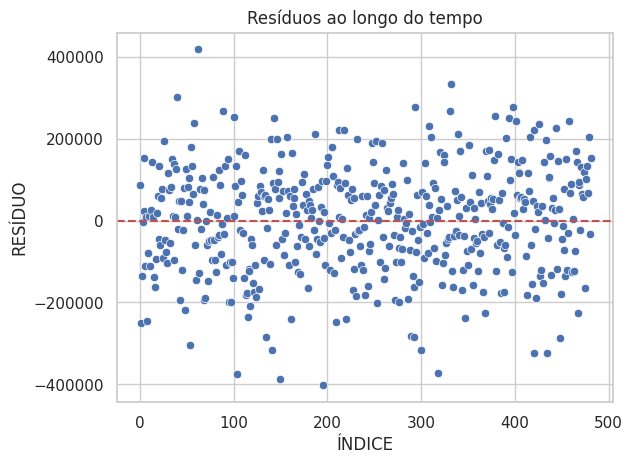

In [38]:
sns.scatterplot(x=range(len(residuals)), y=residuals)

# Adicionando a linha horizontal em y=0
plt.axhline(y=0, color='r', linestyle='--')

# Personalizando o gráfico
plt.xlabel("ÍNDICE")
plt.ylabel("RESÍDUO")
plt.title("Resíduos ao longo do tempo")
plt.grid(True);

Os resíduos (pontos) aparentam estar aleatoriamente distribuídos em torno de 0, sem mesmo grupos visíveis, com distribuição independente.

Apesar do resultado, ainda há outros maneiras de verificar a independência dos resíduos, como a Função de Autocorrelação.

**FUNÇÃO DE AUTOCORRELAÇÃO (ACF)**  
Ferramenta estatística que mede a correlação entre observações de uma série temporal separadas por diferentes lags (intervalos de tempo).

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

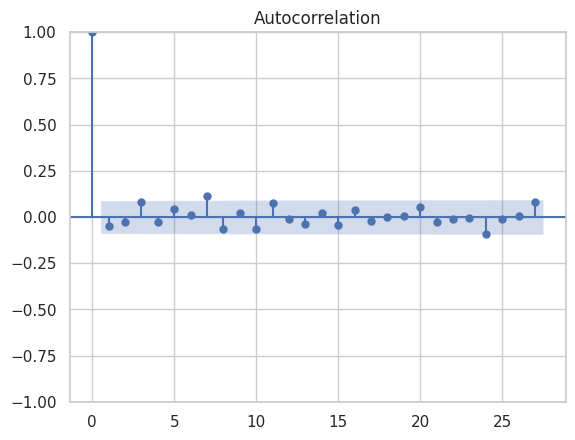

In [40]:
plot_acf(residuals);

As barras dos lags 1 e seguintes estão dentro dos limites de significância (intervalo de confiança). Isso ausência de autocorrelação (resíduos independentes) significativa entre os resíduos para os lags considerados. Essa ausência sugere que o modelo de regressão ajustado é apropriado e que os resíduos se comportam como um ruído branco (aleatoriamente distribuídos).  
Os testes visuais fornecem boa base para entender verificar a independência dos resíduos, contudo, para uma análise mais rigorosa, é interessante realizar o teste de Durbin-Watson para confirmar se há independência entre os resíduos.

**TESTE DE DURBIN-WATSON**  
Detecta a presença de autocorrelação nos resíduos de uma regressão.

In [41]:
from statsmodels.stats.stattools import durbin_watson

In [75]:
# Realizar o teste de Durbin-Watson
durbin_watson(residuals)

2.097004369595216

O resultado próximo a 2 indica independência dos resíduos.

2) Normalidade  
Muitos testes estatísticos e intervalos de confiança associados à regressão linear assumem normalidade dos resíduos. Além disso, a normalidade indica que o modelo está capturando adequadamente a relação entre as variáveis independentes e dependente.

**QQ-PLOT**

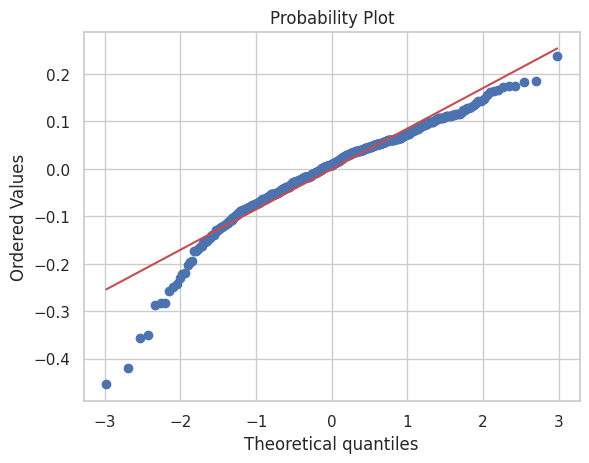

In [77]:
stats.probplot(residuals, dist="norm", plot=plt);

Os dados não se ajustaram perfeitamente a linha de probabilidade, com desvio nas "caudas", contudo, essa diferença parece não ser afetar significativamente a normalidade. Testes numéricos podem comprovar essa hipótese

**TESTES NUMÉRICOS**  
Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Os dados seguem uma distribuição normal;
- **H<sub>1</sub>:** Os dados não seguem uma distribuição normal.

In [76]:
normalidade(pd.DataFrame(residuals, columns=["RESIDUO"]))

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
RESIDUO,2.728072e-13,0.001,3.738671e-76,0.781


Todos os testes estatísticos tiveram p-valor maior que o nível de significância escolhido, portanto, a distribuição dos dados deve ser considerada normal.

3) Homocedasticidade  
Refere-se à situação em que a variância, variabilidade dos erros de um modelo estatístico é constante em todos os valores da (s) variável (eis) independente (s).

**GRÁFICO DE DISPERSÃO**

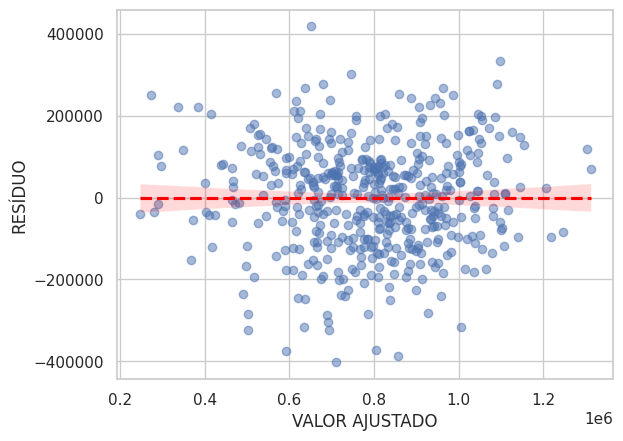

In [45]:
# Gráfico de dispersão com linha de tendência
sns.regplot(x=model.fittedvalues, y=residuals, scatter_kws={"alpha": 0.5},
            line_kws={"color": "red", "linestyle": "--"})

# Configurações do layout
plt.xlabel("VALOR AJUSTADO")
plt.ylabel("RESÍDUO");

Podemos observar que os pontos azuis estão distribuídos aleatoriamente ao redor da linha vermelha. Isso indica que os resíduos são homocedásticos, o que sugere que os pressupostos do modelo de regressão linear estão sendo satisfeitos.

**TESTES NUMÉRICOS**  
Critérios:
- **Nível de significância (α):** 0.05.

Hipóteses:
- **H<sub>0</sub>:** Os resíduos são homocedásticos;
- **H<sub>1</sub>:** Os resíduos são heterocedásticos.

In [46]:
from statsmodels.stats.api import het_breuschpagan, het_white

In [47]:
bp_test = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value',
                    'f p-value'], het_breuschpagan(residuals, model.model.exog))) # ou X_train

bp_test

{'Lagrange multiplier statistic': 2.136144610977839,
 'p-value': 0.7107351760180771,
 'f-value': 0.530848993935152,
 'f p-value': 0.7131262545434117}

Ambos os valores-p altos sugerem que não há evidências de heterocedasticidade nos resíduos do modelo. Isso significa que a variância dos erros parece ser constante.

In [48]:
wt_test = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value',
                    'f p-value'], het_white(residuals, model.model.exog)))

wt_test

{'Lagrange multiplier statistic': 12.112987022884703,
 'p-value': 0.5972294177806324,
 'f-value': 0.8598974378735628,
 'f p-value': 0.6032534752052039}

Os resultados também apontam à homocedasticidade.

**3. COEFICIENTE DE DETERMINAÇÃO**  
1) R-quadrado.  
Medida estatística que quantifica o quanto a linha de regressão se ajusta aos dados.

In [49]:
model.rsquared

0.6711287799211325

O R<sup>2</sup> indica que aproximadamente 67.2% da variância da variável dependente *NOTA_CH* é explicada pelo modelo de regressão, considerando as variáveis independentes *NOTA_CN*, *NOTA_LC*, *NOTA_MT* e *NOTA_REDACAO*.

2) R-quadrado ajustado.  
Forma especial do R-quadrado. Ele tenta corrigir a superestimação do R-quadrado e leva em conta o número de preditores no modelo.

In [50]:
model.rsquared_adj

0.6683709499833643

A diferença entre o valor do R<sup>2</sup> é pequena, o que sugere que o modelo não está sendo excessivamente penalizado por variáveis independentes adicionais.

**4. RMSE**

In [54]:
# Previsões no conjunto de teste
y_pred_boxcox = model.predict(X_test)

# Revertendo transformação de Box-Cox para as previsões
y_pred_rev = (y_pred_boxcox * lambda_boxcox + 1) ** (1 / lambda_boxcox)

In [51]:
from sklearn.metrics import root_mean_squared_error

In [69]:
root_mean_squared_error(y_test, y_pred_rev)

52.84670017882328

**5. PREVISÕES**

In [55]:
# Criando um DataFrame com os valores reais e previstos
pd.DataFrame({'VALOR_REAL': y_test.squeeze(), 'PREVISAO': y_pred_rev})

,VALOR_REAL,PREVISAO
3706,661.500000,661.947150
12141,635.099976,633.714223
12989,592.099976,585.858691
3218,666.099976,668.987400
5181,641.500000,600.962037
...,...,...
8761,602.400024,567.882868
4601,648.799988,653.263166
11535,528.500000,511.042675
10758,522.700012,519.300448
